# Wine Quality Prediction

## Introduction of wine quality data set 

This wine quality data set is obtained originally from UCI Machine Learning Repository, and the revised version data set is from Kaggle. This data set is user-contributed but the vast majority is clean.

This wine quality data set includes white and red vinho verde wine samples from the north of Portugal. Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol is particularly appreciated due to its freshness (especially in the summer).Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). For more details, consult: [Web Link] or the reference [Cortez et al., 2009].

The goal of this wine quality data set is to model wine quality based on physicochemical tests.

Features or input variables included in this data set are: i) type (white and red wine), ii) fixed acidity, iii) volatile acidity, iv) citric acid, v) residual sugar, vi) chlorides, vii) free sulfur dioxide, viii) total sulfur dioxide, ix) density, x) pH, xi) sulphates, xii) alcohol.

Acids (acidity) are major wine properties and contribute greatly to the wine’s taste. They also indicate the process of wine turning into vinegar. Chlorides can be a major contributor to saltiness in wine. Sulfur dioxide is the most common chemical compound used in winemaking. Sulfur serves two main purposes. It prevents the wine from reacting with oxygen which can cause browning and off-odors (oxidation), and it inhibits the growth of bacteria and undesirable wild yeasts in the grape juice and wine. And also sulphates are believed to cause the headache by drinking the wine. Density is generally used as a measure of the conversion of sugar to alcohol. pH is used to specify the acidity and basicity the wine. Of course, alcohol is a very important parameter in the wine because wines are alcoholic beverage. The percentage of alcohol can vary from wine to wine.

The output or target variable based on sensory data is quality (score between 0 and 10).

## Objectives of this project

In this project, the first objective is to build models for evaluating the wine quality based on the physicochemical tests by using supervised machine learning algorithms. The second is to select the best model to predict the wine quality through turning the parameters of the models and comparing the performance of the models.

Now let's take a look this wine quality data set.

## Load data

In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
wine_raw_df = pd.read_csv("winequalityN.csv")
wine_raw_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Investigate the data, and do any necessary data cleaning

### 1. Explore the data basic information

In [3]:
wine_raw_df.shape

(6497, 13)

This wine quality data set has 6497 rows and 13 columns.

In [4]:
wine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine_raw_df.describe(include="all")

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


In [6]:
wine_raw_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
wine_raw_df.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

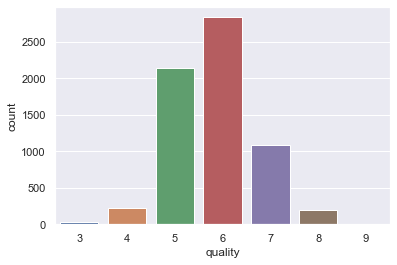

In [8]:
sns.countplot(x='quality', data=wine_raw_df)

From the above data basic information, it can be seen that this data set is pretty clean and not very big size. Except type column, all the other 11 columns have continuous variables.
The target column-quality has a categorical variable. Quality 6 has the most observations, next most is quality 5.

### 2. Explore missing values

In [9]:
# Find the missing values.
wine_raw_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
# Calculate the missing values percentage.
null_percentage = wine_raw_df.isnull().sum()/wine_raw_df.shape[0]*100
null_percentage

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [11]:
# Drop missing values.
wine_df = wine_raw_df.dropna()
wine_df.shape

(6463, 13)

In [12]:
# Missing values drop percentage.
dropna_percentage = (wine_raw_df.shape[0]-wine_df.shape[0])/wine_raw_df.shape[0]*100
dropna_percentage 

0.5233184546713868

### 3. Detect outliers

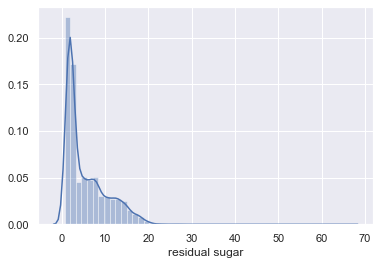

In [13]:
# From statistical description table, residual sugar and free sulfur dioxide have outliers.
# Use Seaborn histogram to detect outliers for these two columns.
# Find the outliers for residual sugar column.
sns.distplot(wine_df['residual sugar'])

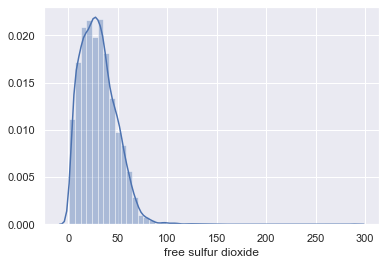

In [14]:
# Find the outliers for free sulfur dioxide column.
sns.distplot(wine_df['free sulfur dioxide'])

It seems that there are obvious outliers in both residual sugar and free sulfur dioxide columns. Hence, let's first clean outliers for these two columns.

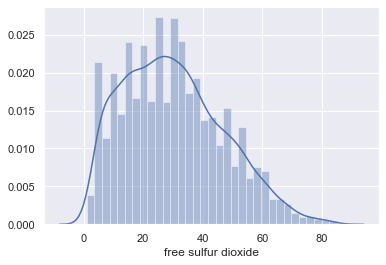

In [15]:
q= wine_df['free sulfur dioxide'].quantile(0.995)
wine_df_1 = wine_df[wine_df['free sulfur dioxide']<q]
sns.distplot(wine_df_1['free sulfur dioxide'])

In [16]:
wine_df_1['free sulfur dioxide'].count()

6429

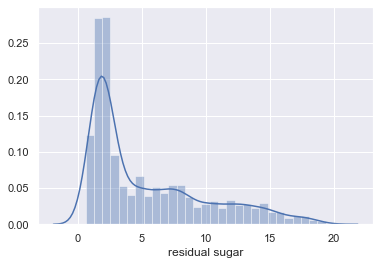

In [17]:
q= wine_df['residual sugar'].quantile(0.995)
wine_df_2 = wine_df_1[wine_df_1['residual sugar']<q]
sns.distplot(wine_df_2['residual sugar'])

In [18]:
wine_df_2['residual sugar'].count()

6395

In [19]:
wine_cleaned_df = wine_df_2
wine_cleaned_df.shape

(6395, 13)

In [20]:
removed_datapoint_percentage = (1- wine_cleaned_df.shape[0]/wine_raw_df.shape[0])*100
removed_datapoint_percentage

1.569955364014164

After dropping the missing values and outliers, the observations decreased from original 6497 to 6395 and about 1.57%. So, from now dropping the missing values and outliers might not make any meaningful changes in the following analysis. 

## Explore data and select features

In [21]:
# Get correlation matrix for numerical variables.
wine_cleaned_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219648,0.324739,-0.117787,0.299520,-0.291946,-0.332164,0.473977,-0.252206,0.303727,-0.098110,-0.076043
volatile acidity,0.219648,1.000000,-0.384712,-0.210894,0.378704,-0.364403,-0.416129,0.274125,0.261254,0.226979,-0.043004,-0.269887
citric acid,0.324739,-0.384712,1.000000,0.135567,0.040190,0.150454,0.198350,0.091207,-0.332761,0.060030,-0.013144,0.085007
residual sugar,-0.117787,-0.210894,0.135567,1.000000,-0.133380,0.441816,0.507985,0.522994,-0.266169,-0.183342,-0.367185,-0.032778
chlorides,0.299520,0.378704,0.040190,-0.133380,1.000000,-0.201433,-0.280407,0.375136,0.044047,0.397916,-0.260111,-0.202481
free sulfur dioxide,-0.291946,-0.364403,0.150454,0.441816,-0.201433,1.000000,0.727979,0.028492,-0.154337,-0.200014,-0.183779,0.077868
total sulfur dioxide,-0.332164,-0.416129,0.198350,0.507985,-0.280407,0.727979,1.000000,0.021876,-0.238555,-0.277615,-0.262143,-0.032997
density,0.473977,0.274125,0.091207,0.522994,0.375136,0.028492,0.021876,1.000000,0.020076,0.275902,-0.704379,-0.313020
pH,-0.252206,0.261254,-0.332761,-0.266169,0.044047,-0.154337,-0.238555,0.020076,1.000000,0.187248,0.117032,0.017294
sulphates,0.303727,0.226979,0.060030,-0.183342,0.397916,-0.200014,-0.277615,0.275902,0.187248,1.000000,-0.008442,0.034776


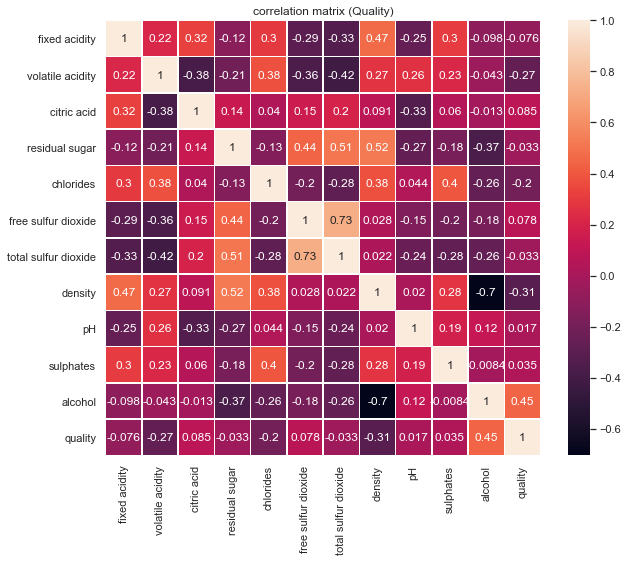

In [22]:
# Make the correlation matrices.
corrmat_wine = wine_cleaned_df.corr()

# Draw the heatmap using seaborn.

plt.figure(figsize=(10,8))

sns.heatmap(corrmat_wine, square=True, annot=True, linewidths=0.5)
plt.title("correlation matrix (Quality)")

plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Convert type columns to numerical.
wine_cleaned_df["type"] = pd.get_dummies(wine_cleaned_df.type, drop_first=True)

In [24]:
# Convert target column quality into binary column.
# Define wine quality less than or equal 5 as 0, means not good quality.
# Define wine quality more than 5 as 1, good quality.

wine_cleaned_df['quality_c'] = np.where(wine_cleaned_df['quality']<=5, 0,1)

In [25]:
wine_cleaned_df['quality_c'].value_counts()

1    4052
0    2343
Name: quality_c, dtype: int64

In [26]:
quality_percentage = wine_cleaned_df['quality'].value_counts()/wine_cleaned_df.shape[0]*100
quality_percentage

6    43.580923
5    32.916341
7    16.763096
4     3.315090
8     2.939797
3     0.406568
9     0.078186
Name: quality, dtype: float64

## Build models

In this capstone, several supervised machine learning models are used for the prediction.

  1. Logistic regression
  2. Decision Tree
  3. Random Forest
  4. Support Vector
  5. KNeighbors
  6. Gaussian Naive Bayes
  7. GradientBoosting

Based on the target variable is a category, the classification models will be created.

### 1. Logistic Regression

In [27]:
# Target variable, binary variable not good (0) and good (1)
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
import time
start_time = time.perf_counter()

lr = LogisticRegression(solver='lbfgs', max_iter=1500, class_weight='balanced')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

lr.fit(X_train, y_train)

# Make a prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

The number of observations in training set is 5116
The number of observations in test set is 1279


In [28]:
# Apply cross validation for Logistic Regression model

score = cross_val_score(lr, X_train, y_train, cv=5)
runtime = time.perf_counter() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %lr.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %lr.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 2.4209279000000095 Seconds
-------------------------------------------------
[0.71582031 0.72140762 0.73607038 0.73020528 0.73900293]
-------------------------------------------------
Accuracy for train set: 0.729 (+/- 0.017)
Accuracy of train set: 0.731 
Accuracy of test set: 0.717 
-------------------------------------------------
[[355 109]
 [253 562]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       464
           1       0.84      0.69      0.76       815

    accuracy                           0.72      1279
   macro avg       0.71      0.73      0.71      1279
weighted avg       0.75      0.72      0.72      1279



In [29]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(lr, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())

lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

In [30]:
# Target variable
Y1 = wine_cleaned_df['quality_c']
# Independent variables
X1 = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

lr = LogisticRegression()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=500)

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1.0, 10, 100, 1000], 'class_weight':[None, 'balanced'], 
               'solver':['lbfgs','newton-cg'],'max_iter':[1000, 1500, 2000] }]


grid_search = GridSearchCV(estimator=lr,
                          param_grid=parameters,
                          cv=5)

grid_search =  grid_search.fit(X1_train, y1_train)
print(grid_search.best_params_)

{'C': 10, 'class_weight': None, 'max_iter': 1000, 'solver': 'newton-cg'}


### 2. Decision Tree

In [31]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# Build the model and tune a variety of model.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

import time
start_time = time.perf_counter()

dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train, y_train)

# Make a prediction
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

# Apply cross validation for Decision Tree model
score = cross_val_score(dtc, X_train, y_train, cv=5)

runtime = time.perf_counter() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %dtc.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %dtc.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.1069344000000001 Seconds
-------------------------------------------------
[0.73925781 0.72531769 0.72140762 0.74486804 0.74095797]
-------------------------------------------------
Accuracy for train set: 0.734 (+/- 0.018)
Accuracy of train set: 0.742 
Accuracy of test set: 0.706 
-------------------------------------------------
[[373  91]
 [285 530]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.80      0.66       464
           1       0.85      0.65      0.74       815

    accuracy                           0.71      1279
   macro avg       0.71      0.73      0.70      1279
weighted avg       0.75      0.71      0.71      1279



In [32]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(dtc, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtc_fit_time = scores['fit_time'].mean()
dtc_score_time = scores['score_time'].mean()
dtc_accuracy = scores['test_accuracy'].mean()
dtc_precision = scores['test_precision_macro'].mean()
dtc_recall = scores['test_recall_macro'].mean()
dtc_f1 = scores['test_f1_weighted'].mean()
dtc_roc = scores['test_roc_auc'].mean()

### 3. Random Forest Model

In [33]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

# Build the model and tune a variety of model.
import time
start_time = time.process_time()

rfc = RandomForestClassifier(n_estimators=15, class_weight='balanced')
rfc.fit(X_train, y_train)

# Make a prediction
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

# Apply cross validation for Random Forest model

score = cross_val_score(rfc, X_train, y_train, cv=5)
runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %rfc.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %rfc.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.546875 Seconds
-------------------------------------------------
[0.80371094 0.79472141 0.83088954 0.82013685 0.80840665]
-------------------------------------------------
Accuracy for train set: 0.812 (+/- 0.025)
Accuracy of train set: 0.996 
Accuracy of test set: 0.824 
-------------------------------------------------
[[333 131]
 [ 94 721]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       464
           1       0.85      0.88      0.87       815

    accuracy                           0.82      1279
   macro avg       0.81      0.80      0.81      1279
weighted avg       0.82      0.82      0.82      1279



In [34]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(rfc, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
rfc_fit_time = scores['fit_time'].mean()
rfc_score_time = scores['score_time'].mean()
rfc_accuracy = scores['test_accuracy'].mean()
rfc_precision = scores['test_precision_macro'].mean()
rfc_recall = scores['test_recall_macro'].mean()
rfc_f1 = scores['test_f1_weighted'].mean()
rfc_roc = scores['test_roc_auc'].mean()

### 4. Support Vector Machines

In [35]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
import time
start_time = time.process_time()

svm = SVC(kernel = 'linear')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)
svm.fit(X_train, y_train)

# Make a prediction
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

# Apply cross validation for Support Vector model

score = cross_val_score(svm, X_train, y_train, cv=5)

runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')

print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %svm.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %svm.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 72.4375 Seconds
-------------------------------------------------
[0.74804688 0.74584555 0.77517107 0.74193548 0.76246334]
-------------------------------------------------
Accuracy for train set: 0.755 (+/- 0.025)
Accuracy of train set: 0.757 
Accuracy of test set: 0.743 
-------------------------------------------------
[[262 202]
 [127 688]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       464
           1       0.77      0.84      0.81       815

    accuracy                           0.74      1279
   macro avg       0.72      0.70      0.71      1279
weighted avg       0.74      0.74      0.74      1279



In [36]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(svm, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
svm_fit_time = scores['fit_time'].mean()
svm_score_time = scores['score_time'].mean()
svm_accuracy = scores['test_accuracy'].mean()
svm_precision = scores['test_precision_macro'].mean()
svm_recall = scores['test_recall_macro'].mean()
svm_f1 = scores['test_f1_weighted'].mean()
svm_roc = scores['test_roc_auc'].mean()

### 5. KNeighbors Model

In [37]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.process_time()

neighbors = KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)
neighbors.fit(X_train,y_train)

# Make a prediction
y_pred_test = neighbors.predict(X_test)
y_pred_train = neighbors.predict(X_train)

# Apply cross validation for KNN model

score = cross_val_score(neighbors, X_train, y_train, cv=5)
runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %neighbors.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %neighbors.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.4375 Seconds
-------------------------------------------------
[0.6640625  0.68426197 0.69990225 0.67937439 0.69110459]
-------------------------------------------------
Accuracy for train set: 0.684 (+/- 0.024)
Accuracy of train set: 0.761 
Accuracy of test set: 0.690 
-------------------------------------------------
[[232 232]
 [165 650]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       464
           1       0.74      0.80      0.77       815

    accuracy                           0.69      1279
   macro avg       0.66      0.65      0.65      1279
weighted avg       0.68      0.69      0.68      1279



In [38]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(neighbors, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
knn_fit_time = scores['fit_time'].mean()
knn_score_time = scores['score_time'].mean()
knn_accuracy = scores['test_accuracy'].mean()
knn_precision = scores['test_precision_macro'].mean()
knn_recall = scores['test_recall_macro'].mean()
knn_f1 = scores['test_f1_weighted'].mean()
knn_roc = scores['test_roc_auc'].mean()

### 6. Gaussian Naive Bayes

In [39]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.drop(['quality','quality_c'], axis=1)

from sklearn.naive_bayes import GaussianNB
# Build the model and tune a variety of model.
import time
start_time = time.process_time()

gnb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)
gnb.fit(X_train, y_train)

# Make a prediction
y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

# Apply cross validation for  Gaussian Naive Bayes model

score = cross_val_score(gnb, X_train, y_train, cv=5)
runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %gnb.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %gnb.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 0.015625 Seconds
-------------------------------------------------
[0.66796875 0.67644184 0.70478983 0.6568915  0.68328446]
-------------------------------------------------
Accuracy for train set: 0.678 (+/- 0.032)
Accuracy of train set: 0.683 
Accuracy of test set: 0.671 
-------------------------------------------------
[[219 245]
 [176 639]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       464
           1       0.72      0.78      0.75       815

    accuracy                           0.67      1279
   macro avg       0.64      0.63      0.63      1279
weighted avg       0.66      0.67      0.66      1279



In [40]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(gnb, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
gnb_fit_time = scores['fit_time'].mean()
gnb_score_time = scores['score_time'].mean()
gnb_accuracy = scores['test_accuracy'].mean()
gnb_precision = scores['test_precision_macro'].mean()
gnb_recall = scores['test_recall_macro'].mean()
gnb_f1 = scores['test_f1_weighted'].mean()
gnb_roc = scores['test_roc_auc'].mean()

### 7. GradientBoosting Model

In [41]:
# Target variable
Y = wine_cleaned_df['quality_c']
# Independent variables
X = wine_cleaned_df.loc[:, ~wine_cleaned_df.columns.isin(['quality', 'quality_c'])]

# Build the model and tune a variety of model.
# We'll make 400 iterations, use 2-deep trees, and set our loss function.
import time
start_time = time.process_time()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(n_estimators=400,
          max_depth=4,
          loss='deviance')
gbc.fit(X_train, y_train)

# Make a prediction
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

# Apply cross validation for Gradient Boosting model

score = cross_val_score(gbc, X_train, y_train, cv=5)

runtime = time.process_time() - start_time
print("Runtime: {} Seconds".format(runtime))
print('-------------------------------------------------')
print(score)
print('-------------------------------------------------')
print("Accuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print("Accuracy of train set: %0.3f " %gbc.score(X_train, y_train))
print("Accuracy of test set: %0.3f " %gbc.score(X_test, y_test))
print('-------------------------------------------------')
print(confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_test))

Runtime: 18.265625 Seconds
-------------------------------------------------
[0.81640625 0.79472141 0.82111437 0.79472141 0.79569892]
-------------------------------------------------
Accuracy for train set: 0.805 (+/- 0.023)
Accuracy of train set: 0.942 
Accuracy of test set: 0.808 
-------------------------------------------------
[[334 130]
 [116 699]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       464
           1       0.84      0.86      0.85       815

    accuracy                           0.81      1279
   macro avg       0.79      0.79      0.79      1279
weighted avg       0.81      0.81      0.81      1279



In [42]:
# Create the perfomance report from the cross_validate for comparison.
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(gbc, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
gbc_fit_time = scores['fit_time'].mean()
gbc_score_time = scores['score_time'].mean()
gbc_accuracy = scores['test_accuracy'].mean()
gbc_precision = scores['test_precision_macro'].mean()
gbc_recall = scores['test_recall_macro'].mean()
gbc_f1 = scores['test_f1_weighted'].mean()
gbc_roc = scores['test_roc_auc'].mean()

### Compare the performance of the models

In [43]:
# Create a table for comparing the evaluation results of the models.
models_comparison_df = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree','Random Forest', 'Support Vector Machines', 'KNeighbors', 'Gaussian Naive Bayes',
             'GradientBoosting'],
    'Fit_time':[lr_fit_time, dtc_fit_time, rfc_fit_time, svm_fit_time, knn_fit_time, gnb_fit_time, gbc_fit_time],
    'Score_time':[lr_score_time, dtc_score_time, rfc_score_time, svm_score_time,knn_score_time,gnb_score_time,gbc_score_time,],
    'Accuracy':[lr_accuracy,dtc_accuracy,rfc_accuracy,svm_accuracy,knn_accuracy,gnb_accuracy,gbc_accuracy],
    'Precision':[lr_precision,dtc_precision,rfc_precision,svm_precision,knn_precision,gnb_precision,gbc_precision],
    'Recall':[lr_recall,dtc_recall,rfc_recall,svm_recall,knn_recall,gnb_recall,gbc_recall],
    'F1_score':[lr_f1,dtc_f1,rfc_f1,svm_f1,knn_f1,gnb_f1,gbc_f1],
    'ROC_AUC':[lr_roc,dtc_roc,rfc_roc,svm_roc,knn_roc,gnb_roc,gbc_roc],
}, columns=['Model','Fit_time', 'Score_time','Accuracy','Precision','Recall','F1_score','ROC_AUC'])

models_comparison_df.sort_values(by='Accuracy', ascending=False)


,Model,Fit_time,Score_time,Accuracy,Precision,Recall,F1_score,ROC_AUC
2,Random Forest,0.081269,0.010224,0.813137,0.802591,0.789592,0.811082,0.875251
6,GradientBoosting,2.931924,0.016582,0.805901,0.793356,0.783977,0.804270,0.865319
3,Support Vector Machines,10.886896,0.048113,0.754692,0.740874,0.715380,0.747838,0.804608
1,Decision Tree,0.015843,0.002863,0.734166,0.725343,0.739702,0.738252,0.797844
0,Logistic Regression,0.409236,0.006443,0.728501,0.717966,0.732194,0.732761,0.805933
4,KNeighbors,0.006638,0.042865,0.683741,0.655385,0.639336,0.675089,0.709822
5,Gaussian Naive Bayes,0.003122,0.006249,0.677875,0.649134,0.637369,0.671215,0.742163


In [44]:
models_comparison_df.sort_values(by='Accuracy', ascending=False).style.set_table_styles(
[{'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}]
)   

,Model,Fit_time,Score_time,Accuracy,Precision,Recall,F1_score,ROC_AUC
2,Random Forest,0.081269,0.010224,0.813137,0.802591,0.789592,0.811082,0.875251
6,GradientBoosting,2.931924,0.016582,0.805901,0.793356,0.783977,0.804270,0.865319
3,Support Vector Machines,10.886896,0.048113,0.754692,0.740874,0.715380,0.747838,0.804608
1,Decision Tree,0.015843,0.002863,0.734166,0.725343,0.739702,0.738252,0.797844
0,Logistic Regression,0.409236,0.006443,0.728501,0.717966,0.732194,0.732761,0.805933
4,KNeighbors,0.006638,0.042865,0.683741,0.655385,0.639336,0.675089,0.709822
5,Gaussian Naive Bayes,0.003122,0.006249,0.677875,0.649134,0.637369,0.671215,0.742163


From the models comparison table, it can be concluded that the Random Forest model is the best model for this wine quality datas set. It has the highest accuracy of about 80.8%. ROC value is also very good (0.873). Gradient Boosting model through tuning the parameter, it also has high accuracy but it needs more running time compared with the Random Forest. In addition, Support Vector Machines has the longest running time in the 7 models.

### Feature importance for the Random Forest Model

In [45]:
# Create feature importance for the Random Forest Model.
rfc.feature_importances_

array([0.00533916, 0.06296613, 0.10982872, 0.07577047, 0.07643368,
       0.07608493, 0.08033908, 0.07796664, 0.10673578, 0.06996193,
       0.07455534, 0.18401813])

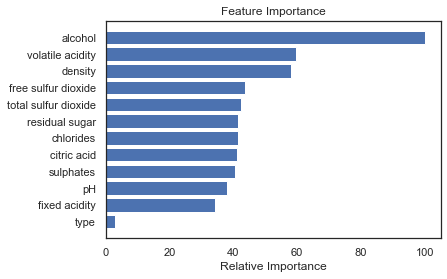

In [46]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

sns.set_style('white')
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

It appears that alcohol, volatile acidity and density are the most important features in predicting wine quality. This is reasonable. Wines are alcoholic beverage. Density indicates the conversion of sugar to alcohol. Acidity and density (sugar) can influence the taste of the wine. Hence these features shows more important than others.

## Conclusions

  1. From the models comparison, it can be observed that the Random Forest is the best model for predicting the wine quality.
  2. The random forest model has about overall 82% accuracy for prediction.
  3. The Gradient Boosting model is also a good model but has slow running speed compared to the Random Forest model.
  4. Compared with other 6 models, support vector machines have the longest running time.
  5. The three features of alcohol, volatile acidity and density seems the most important features in predicting wine quality.
  6. The model built in this project is based on wine physicochemical properties and very good for predicting the wine quality. If physicochemical properties of wines are provided, the wine producer could gain insight and information about their wine quality through the model.
  7. The data set gives the red and white wine info, but no any data about grape types, wine brand, location, temperature, etc. This limits the model in real world practical applications.